Backtracking
     1     2.02975e-02     2.03547e+03     3.16717e+01
     2     3.89180e-02     1.89600e+03     2.51061e+01
     3     4.45611e-02     1.81464e+03     9.69878e+00
     4     4.51048e-02     1.79951e+03     4.98884e+00
     5     2.54535e-02     1.79462e+03     4.19159e+00
     6     1.93033e-02     1.79183e+03     4.88525e+00
     7     2.82153e-02     1.78987e+03     4.38789e+00
     8     7.86475e-02     1.78724e+03     3.33814e+00
     9     8.89731e-02     1.78230e+03     2.22077e+00
    10     1.01708e-01     1.78008e+03     1.41989e+00
    11     4.10543e-02     1.77926e+03     9.46693e-01
    12     2.16018e-02     1.77905e+03     8.97303e-01
    13     2.04504e-02     1.77886e+03     5.98922e-01
    14     5.78350e-02     1.77880e+03     5.57690e-01
    15     2.28304e-01     1.77866e+03     4.43542e-01
    16     2.17410e-01     1.77839e+03     3.14196e-01
    17     3.43622e-02     1.77835e+03     7.68934e-01
    18     2.62346e-02     1.77828e+03     3.31201e-

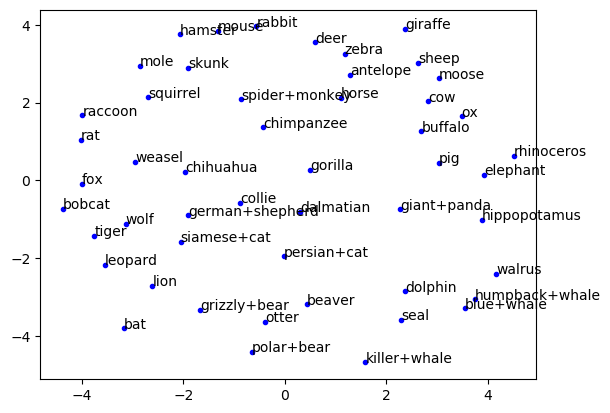

    1.00000e+00     1.77825e+03     3.32334e-01
    23     1.03557e-01     1.77818e+03     1.57101e+00
    24     5.05757e-02     1.77797e+03     1.69316e+00
    25     2.77786e-02     1.77777e+03     8.43399e-01
    26     2.04531e-02     1.77767e+03     6.73934e-01
    27     2.06229e-02     1.77763e+03     5.61810e-01
    28     1.65408e-01     1.77761e+03     5.27470e-01
    29     1.94121e-01     1.77748e+03     4.03995e-01
    30     9.57514e-02     1.77745e+03     2.13989e-01
    31     3.07538e-02     1.77745e+03     2.95706e-01
    32     2.11385e-02     1.77743e+03     1.48261e-01
    33     2.02918e-02     1.77743e+03     1.51875e-01
    34     3.59056e-02     1.77743e+03     1.50033e-01
    35     4.59511e-02     1.77742e+03     1.47736e-01
    36     1.00000e+00     1.77742e+03     1.42942e-01
    37     6.92945e-02     1.77737e+03     5.20205e-01
    38     4.79148e-02     1.77732e+03     6.04817e-01
    39     8.03872e-03     1.77730e+03     6.35485e-01
    40     7.8665

In [1]:
include("example_MDS.jl")

# 2.1 ISOMAP

In [2]:
include("misc.jl")
include("PCA.jl")
include("findMin.jl")

function MDS_isomap(X)
    (n,d) = size(X)

    # Compute all distances
    D = distancesSquared(X,X)
    D = sqrt.(abs.(D))

    neighbours = KNN(D)
    graph = GenGraph(D, neighbours)
    Dnew = DijkstraD(graph)
    
    # Initialize low-dimensional representation with PCA
    model = PCA(X,2)
    Z = model.compress(X)

    funObj(z) = stress(z,Dnew)

    Z[:] = findMin(funObj,Z[:])

    return Z
end

function KNN(D, k=3)
    n = size(D,1)
    neighbours = zeros(Int64, n,k)
    for i in 1:n
        neighbours[i,:] = sortperm(D[:,i])[2:1+k]
    end
    return neighbours        
end

function GenGraph(D, neighbours, init=Inf64)
    (n,k) = size(neighbours)
    graph = ones(n,n)*init
    
    for i in 1:n
        for j in 1:k
            graph[i,neighbours[i,j]] = D[i,neighbours[i,j]]
            graph[neighbours[i,j],i] = D[i,neighbours[i,j]]
        end
    end
    return graph
end

function DijkstraD(graph)
    n = size(graph, 1)
    D = zeros(n,n)
    for i in 1:n
        for j in 1:i-1
            D[i,j] = dijkstra(graph,i,j)
            D[j,i] = D[i,j]
        end
    end
    return D
end

function stress(z,D)
    n = size(D,1)
    Z = reshape(z,n,2)

    f = 0
    G = zeros(n,2)
    for i in 1:n
        for j in i+1:n
            # Objective function
            Dz = norm(Z[i,:] - Z[j,:])
            s = D[i,j] - Dz
            f = f + (1/2)s^2

            # Gradient
            df = s
            dgi = (Z[i,:] - Z[j,:])/Dz
            dgj = (Z[j,:] - Z[i,:])/Dz
            G[i,:] -= df*dgi
            G[j,:] -= df*dgj
        end
    end
    return (f,G[:])
end


stress (generic function with 1 method)

Backtracking
     1     1.99739e

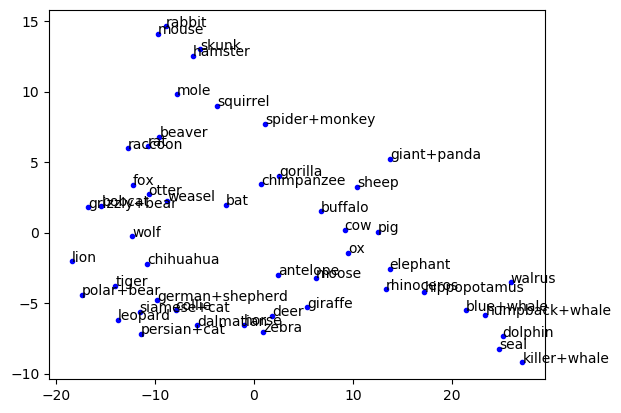

-02     1.51786e+04     1.79430e+02
     2     4.15529e-02     9.53150e+03     1.09855e+02
     3     3.85996e-02     5.77597e+03     4.97975e+01
     4     3.39240e-02     4.74733e+03     3.84539e+01
     5     2.65191e-02     4.25377e+03     4.44419e+01
     6     2.09353e-02     3.93638e+03     4.46789e+01
     7     5.70593e-02     3.71108e+03     4.14500e+01
     8     3.44220e-02     3.19255e+03     4.82042e+01
     9     6.02845e-02     2.90246e+03     3.86902e+01
    10     5.60229e-02     2.52784e+03     3.70556e+01
    11     7.38552e-02     2.27653e+03     2.67888e+01
    12     3.29772e-02     2.10835e+03     2.17470e+01
    13     2.18741e-02     2.03734e+03     2.18730e+01
    14     2.39077e-02     1.99896e+03     1.96682e+01
    15     1.13267e-01     1.97048e+03     1.73066e+01
    16     1.23137e-01     1.88913e+03     7.95414e+00
    17     3.62795e-02     1.86637e+03     7.87939e+00
    18     2.15052e-02     1.85709e+03     4.91304e+00
    19     2.02605e-02     1.

In [3]:
# Load data
using DelimitedFiles
dataTable = readdlm("animals.csv",',')
X = float(real(dataTable[2:end,2:end]))
(n,d) = size(X)

# include("MDS.jl")
Z = MDS_isomap(X)

# Plot matrix as image
using PyPlot
figure(1)
clf()
plot(Z[:,1],Z[:,2],"b.")
for i in 1:n
    annotate(dataTable[i+1,1],
	xy=[Z[i,1],Z[i,2]],
	xycoords="data")
end


# 2.2

In [4]:
include("misc.jl")
include("PCA.jl")
include("findMin.jl")

function MDS_isomap_2(X)
    (n,d) = size(X)

    # Compute all distances
    D = distancesSquared(X,X)
    D = sqrt.(abs.(D))

    neighbours = KNN(D, 2)
    graph = GenGraph(D, neighbours)
    Dnew = DijkstraD(graph)
    replace!(Dnew, Inf=>maximum(filter(!isinf, Dnew)))
    
    # Initialize low-dimensional representation with PCA
    model = PCA(X,2)
    Z = model.compress(X)

    funObj(z) = stress(z,Dnew)

    Z[:] = findMin(funObj,Z[:])

    return Z
end

function KNN(D, k=3)
    n = size(D,1)
    neighbours = zeros(Int64, n,k)
    for i in 1:n
        neighbours[i,:] = sortperm(D[:,i])[2:1+k]
    end
    return neighbours        
end

function GenGraph(D, neighbours, init=Inf64)
    (n,k) = size(neighbours)
    graph = ones(n,n)*init
    
    for i in 1:n
        for j in 1:k
            graph[i,neighbours[i,j]] = D[i,neighbours[i,j]]
            graph[neighbours[i,j],i] = D[i,neighbours[i,j]]
        end
    end
    return graph
end

function DijkstraD(graph)
    n = size(graph, 1)
    D = zeros(n,n)
    for i in 1:n
        for j in 1:i-1
            D[i,j] = dijkstra(graph,i,j)
            D[j,i] = D[i,j]
        end
    end
    return D
end

function stress(z,D)
    n = size(D,1)
    Z = reshape(z,n,2)

    f = 0
    G = zeros(n,2)
    for i in 1:n
        for j in i+1:n
            # Objective function
            Dz = norm(Z[i,:] - Z[j,:])
            s = D[i,j] - Dz
            f = f + (1/2)s^2

            # Gradient
            df = s
            dgi = (Z[i,:] - Z[j,:])/Dz
            dgj = (Z[j,:] - Z[i,:])/Dz
            G[i,:] -= df*dgi
            G[j,:] -= df*dgj
        end
    end
    return (f,G[:])
end


stress (generic function with 1 method)

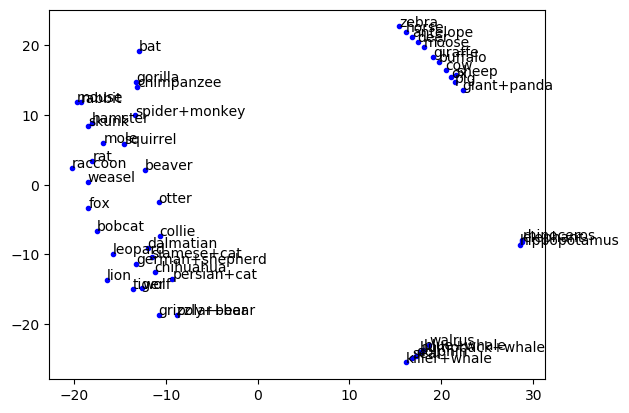

Backtracking
     1     2.00098e-02     4.23260e+04     1.84897e+02
     2     3.59515e-02     3.50295e+04     1.45401e+02
     3     4.04169e-02     2.90039e+04     1.67329e+02
     4     4.22762e-02     2.63857e+04     6.26903e+01
     5     5.07837e-02     2.55982e+04     6.76161e+01
     6     4.27324e-02     2.49639e+04     6.65679e+01
     7     2.27104e-02     2.44740e+04     7.22089e+01
     8     2.71402e-02     2.42132e+04     7.36334e+01
     9     1.46858e-01     2.39180e+04     7.20017e+01
    10     8.47582e-02     2.31215e+04     5.99515e+01
Backtracking
    11     3.07188e-02     2.30161e+04     7.15785e+00
    12     2.31458e-02     2.30080e+04     4.19199e+00
    13     2.37715e-02     2.30052e+04     2.66800e+00
    14     6.12560e-02     2.30040e+04     2.04012e+00
    15     9.83464e-02     2.30025e+04     1.02829e+00
    16     6.04285e-02     2.30022e+04     4.16730e-01
Backtracking
    17     2.02358e-02     2.30021e+04     1.55422e-01
    18     3.88319e-02    

In [5]:
# Load data
using DelimitedFiles
dataTable = readdlm("animals.csv",',')
X = float(real(dataTable[2:end,2:end]))
(n,d) = size(X)

# include("MDS.jl")
Z = MDS_isomap_2(X)

# Plot matrix as image
using PyPlot
figure(1)
clf()
plot(Z[:,1],Z[:,2],"b.")
for i in 1:n
    annotate(dataTable[i+1,1],
	xy=[Z[i,1],Z[i,2]],
	xycoords="data")
end
